# Assignment 1


## P1. MNIST Classification Using Multi-Class Logistic Regression 

### Task

Consider a L2-regularized multi-class logistic regression model using the MNIST dataset. 

The model is given by

<img src="https://latex.codecogs.com/svg.latex?\Large&space;\hat{y}=\sigma(W^TX+\mathbf{b})" title="x=b" />, where <img src="https://latex.codecogs.com/svg.latex?\Large&space;\sigma(\cdot)" title="\Large cross-entropy" /> is 
the softmax function 
<img src="https://latex.codecogs.com/svg.latex?\Large&space;\sigma_j(\mathbf{z})=\frac{e^{z_j}}{\sum_{k=1}^Ke^{z_k}}" title="softmax" /> for <img src="https://latex.codecogs.com/svg.latex?\Large&space;j=1,2,\ldots,K" title="sum" />. 

The objective is the cross-entropy loss function:

<img src="https://latex.codecogs.com/svg.latex?\Large&space;\ell(\hat{y},y)=-y\log(\hat{y})-(1-y)\log(1-\hat{y})" title="\Large cross-entropy" />

with a L2 regularizer on the weight parameters <img src="https://latex.codecogs.com/svg.latex?\Large&space;W" title="W" />, i.e., <img src="https://latex.codecogs.com/svg.latex?\Large&space;\lambda||W||^2" title="\Large cross-entropy" /> where <img src="https://latex.codecogs.com/svg.latex?\Large&space;\lambda" title="\Large cross-entropy" /> is a hyper-parameter. 

The hyper-parameter settings are given as below:
- minibatch size = 128 
- starting learning rate <img src="https://latex.codecogs.com/svg.latex?\Large&space;\eta^{(0)}=\eta=0.001" title="\Large cross-entropy"/>
- decaying learning rate <img src="https://latex.codecogs.com/svg.latex?\Large&space;\eta^{(t)}=\eta/\sqrt{t}" title="\Large cross-entropy"/> during training where <img src="https://latex.codecogs.com/svg.latex?\Large&space;t" title="t"/> is the number of epochs 
- <img src="https://latex.codecogs.com/svg.latex?\Large&space;\lambda=0.01" title="\Large cross-entropy"/>
- total number of epoches = 45
- momentum parameter = 0.7

**Task:** evaluate and plot **the average loss per epoch** versus the number of epoches for the training dataset, for the following optimization algorithms:
- Mini-batch gradient descent
- Mini-batch AdaGrad
- Mini-batch gradient descent with Nesterov’s momentum
- Mini-batch Adam 

Discuss how the performances of different optimization algorithms compare to each other.

### Implementation and Results

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

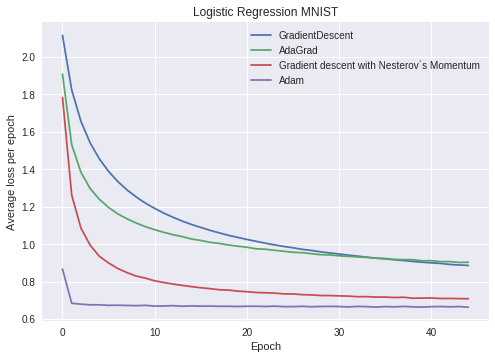

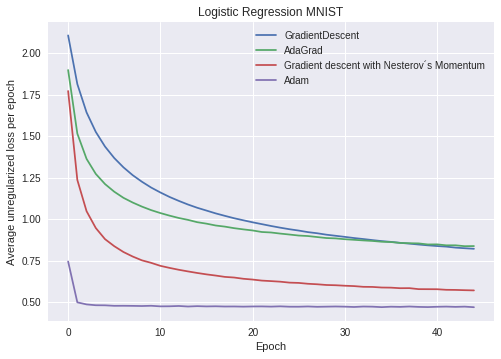

In [0]:
# Imports.
import tensorflow as tf
import numpy as np
import pylab as plt
import random
import time

# Download the data. 
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("mnist", one_hot=True)

# Parameters. 
minibatch_size = 128
num_epochs = 45
momentum = 0.7
starting_learning_rate = 0.001
l2_regularization_penalty = 0.01
num_batches = np.ceil(55000/minibatch_size).astype(int)

num_features = 784
num_labels = 10

# Inputs. 
tf_train_set = tf.placeholder(tf.float32, [None, 784], name = 'tf_train_set') 
tf_train_labels = tf.placeholder(tf.float32,  [None, 10], name = 'tf_train_labels') 
learning_rate = tf.placeholder(tf.float32, shape=[])

# Variables. 
weights = tf.Variable(tf.random_normal(shape = [784,10], stddev = 0.01), name = 'weights') 
biases = tf.Variable(tf.zeros([1,10], name= 'bias'))

# Training computation. 
logits = tf.matmul(tf_train_set, weights) + biases 

# Loss.
unregularized_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    labels=tf_train_labels, logits=logits)) 
l2_loss = tf.reduce_mean(l2_regularization_penalty * tf.nn.l2_loss(weights)*2)
loss = tf.add(unregularized_loss, l2_loss, name='loss')


# Function minibatch_training.
# Input:  opt_type - name of optimizer algorithm in tensforflow. 
#         opt_name - short name of optimizer algorithm as string.
# Output: list of losses per epoch.

def minibatch_training(opt_type, opt_name):
  
  # Optimizer. 
  if opt_type == 'tf.train.MomentumOptimizer':
    optimizer = tf.train.MomentumOptimizer(learning_rate, use_nesterov=True, momentum=0.7).minimize(loss) 
  else:
    optimizer = opt_type(learning_rate).minimize(loss) 
  
  with tf.Session() as session: 
    
    # Initialize weights and biases.
    random.seed(122)
    session.run(tf.global_variables_initializer()) 
    loss_list = []
    unreg_loss_list = []

    for step in range(num_epochs): 
      
      loss_list_minibatches = []
      unreg_loss_list_minibatches = []
      decayed_learning_rate = starting_learning_rate/np.sqrt(step+1)
      
      for i in range(num_batches):
        
        # Generate a minibatch. 
        batch_data, batch_labels = mnist.train.next_batch(minibatch_size)

        # Run one step of computation. 
        feed_dict = {tf_train_set : batch_data, 
                     tf_train_labels : batch_labels,
                     learning_rate : decayed_learning_rate} 
        _, l, ul = session.run([optimizer, loss, unregularized_loss], feed_dict=feed_dict) 
        loss_list_minibatches.append(l)
        unreg_loss_list_minibatches.append(ul)
        
      # Average loss per epoche.  
      loss_list.append(np.mean(loss_list_minibatches))
      unreg_loss_list.append(np.mean(unreg_loss_list_minibatches))
      if step % 10 == 0:
        print('Epoche: {}, loss: {:.4f}, unregularized loss: {:.4f}'.format(step, loss_list[step], unreg_loss_list[step]))

  return (loss_list, unreg_loss_list)


# Loss lists for four different optimizers.
losses = np.zeros((num_epochs, 4))
unreg_losses = np.zeros((num_epochs, 4))
i = 0
for (opt, opt_name) in [(tf.train.GradientDescentOptimizer, 'GradientDescent'), (tf.train.AdagradOptimizer, 'AdaGrad'), ('tf.train.MomentumOptimizer', 'Gradient descent with Nesterov´s Momentum'), (tf.train.AdamOptimizer, 'Adam')]:
  print('\n', opt_name)
  start_time = time.time()
  losses[:,i], unreg_losses[:,i] = minibatch_training(opt, opt_name)
  
  # Print computational time.
  print("--- %s seconds ---" % (time.time() - start_time))
  i = 1 + i

# Plot losses for each algorithm.
print('\n')
names = ['GradientDescent', 'AdaGrad', 'Gradient descent with Nesterov´s Momentum', 'Adam']
for i in range(4):
  plt.plot(losses[:,i], label = names[i])
plt.ylabel('Average loss per epoch')
plt.xlabel('Epoch')
plt.title('Logistic Regression MNIST')
plt.legend(loc='upper right')
plt.show()

# Plot unregularized losses for each algorithm.
names = ['GradientDescent', 'AdaGrad', 'Gradient descent with Nesterov´s Momentum', 'Adam']
for i in range(4):
  plt.plot(unreg_losses[:,i], label = names[i])
plt.ylabel('Average unregularized loss per epoch')
plt.xlabel('Epoch')
plt.title('Logistic Regression MNIST')
plt.legend(loc='upper right')
plt.show()

### Discussion of Results

#### Results
The best results are achieved by the Adam algorithm which leads to an average loss of nearly 0.87 in the first epoch. After one epoch the loss drops to under 0.7 and decreases only slowly thereafter to a value of 0.66 after 50 epochs. However, comparing the computational time given GPU as runtime type Adam takes nearly 2 seconds longer than the fastest algorithm, gradient descent. This additional computational time can however be neglected in this setting considering that the training of 45 epochs takes only about 40 seconds resp. 42 seconds with gradient descent resp. Adam. 

The second best performance with respect to loss is achieved by using the gradient descent optimizer with Nesterov's momentum. It starts with an average loss of around 1.78, but decreases to under 1.3 after only one epoche. Although the loss using Nesterov's momentum is still nearly twice as high as the results achieved by using Adam, its loss decrease diminishes only slowly such that a loss of only 0.72 occurs after ten epochs. The final loss is around 0.56. 

The average loss of the CNN model using the AdaGrad resp. the gradient descent optimizer is 1.91 resp. 2.11 in the first epoch which lies above the loss achieved with the other optimizers. The respective absolute decrease in loss is slower than in the case when using other optimizers (0.4 for AdaGrad, 0.3 for gradient descent). After ten epochs AdaGrad still outperforms gradient descent with a loss of only 1.03 compared to 1.16. However, the loss decreases faster with AdaGrad than with gradient descent in the first five epochs. In contrast to all other methods, gradient descent still decreases considerably after 30 epochs such that it ends with a loss of 0.89 which is lower than the loss achieved with AdaGrad (0.93).

The forms of the curves suggest that the gradient descent optimizer would outperform the AdaGrad algorithm even stronger when more epochs would haven been trained. 

Even when comparing the computational time given GPU as runtime type Adam shows to be the most efficient algorithm learning fast and having a stabilised average loss per epoch rate of around 0.7 respectively 0.48 of average unregularized loss per epoch, by mimicking the basic concept of momentum. 

Considering the unregularized average loss (loss without l2 weight regularization) presented in the second plot leads to similar results as before, especially with respect to the ranking of the optimizers. The absolute difference between the regularized and the unregularized loss increases with the number of epochs probably due to the low learning rate. This difference is the lowest when using the gradient descent algorithm and the highest when using Adam.

#### Interpretation
Ruder (2016) states that Adam has been established as the best performing optimizer such that it is not surprising that it also performs best in this setting.

The fact that the loss reduction is accelerated with optimizers such as AdaGrad, gradient descent with Nesterov's momentum and Adam compared to vanilla mini-batch gradient descent roots in the use of momentum. Momentum takes into account the direction of the previous gradients when updating and thus accelerates convergence and softens oscillations in wrong directions. 

Further differences could be explained by improper choice of hyperparameters.

One challenge mini-batch gradient descent poses is the right choice of the learning rate. While a small learning rate leads to slow convergence, a high learning rate can hinder convergence (Ruder, 2016). Since the decrease in average loss over the last 5 epochs is the largest when using the gradient descent optimizer, the learning rate is too low and better results would have been achieved using higher learning rates or more epochs.

In contrast to that, Adam and AdaGrad do not depend in such a degree on the learning rate since the learning rate is computed adaptively. Adam outperforms all other optimizers since it adapts the learning rate dependent on the frequency of the parameters. However, the loss using AdaGrad decreases a lot in the beginning while the loss stabilizes after 20 epochs. This might root from the accumulation of the squared gradients in the denominator when adapting the learning rate such that the adapted rate shrinkes and becomes infinitesimally small after many epochs (Ruder, 2016). This problem is espececially imminent when the learning rate is relatively small and even decays over time as is the case in this setting. The learning rate here is chosen ten times as small as the value claimed to be most common in practise (Ruder, 2016).

Further, Ruder (2016) claims that the momentum for the gradient descent optimizer with Nesterov's momentum is commonly chosen as 0.9. A value of 0.7 as implemented here could be too low.

## P2. CIFAR10 CNN: Convergence of Minibatch Gradient Descent

### Task


Implement a CNN architecture that consists of 3 convolutional layers followed by a hidden fully connected layer of 1000 units. 

Each convolutional layer consists of a sublayer of 5x5 convolutional filters with stride 1 followed by a sublayer of 2x2 max-pool units with stride 2. Each neuron applies ReLU activation function.

**Task:** answer the same questions as in Problem P1. In addition, show the results by adding dropout. Comment the results. 

**Hints:**

- Load CIFAR10 data by the following code:
```
from keras.datasets import cifar10
(data_train, label_train), (data_test, label_test) = cifar10.load_data()
```
- In order to reduce the training time, use only the first 50 mini-batches for each epoch. 
- More specifically, at the beginning of each epoch, randomly shuffle the whole dataset training dataset. Then, only iterate through the first 50 mini-batches for one epoch training.  
- Training on Google Colab GPU is highly recommended. The training time on 1 GPU is roughly 1 minute per epoch.  

The hyper-parameter settings:
- minibatch size = 128 
- learning rate = 0.001
- total number of epoches = 100

### Implementation and Results


 GradientDescent
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.dense instead.
training =  True
Epoch: 0, Loss: 6.6560
Epoch: 20, Loss: 2.2637
Epoch: 40, Loss: 2.2359
Epoch: 60, Loss: 2.2136
Epoch: 80, Loss: 2.1868
--- 155.32601618766785 seconds ---

 AdaGrad
training =  True
Epoch: 0, Loss: 16.0054
Epoch: 20, Loss: 2.2182
Epoch: 40, Loss: 2.1159
Epoch: 60, Loss: 2.0402
Epoch: 80, Loss: 1.9747
--- 137.6989049911499 seconds ---

 Gradient descent with Nesterov´s Momentum
training =  True
Epoch: 0, Loss: 8.0785
Epoch: 20, Loss: 2.2455
Epoch: 40, Loss: 2.2145
Epoch: 60, Loss: 2.1952
Epoch: 80, Loss: 2.1899
--- 154.14705181

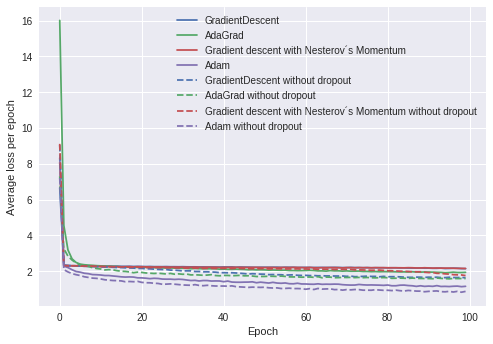

In [0]:
# Imports.
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import random
import time

# Download the data.
from keras.datasets import cifar10
(data_train, label_train), (data_test, label_test) = cifar10.load_data()

# Parameters.
num_train, img_rows, img_cols, img_channels =  data_train.shape
num_classes = 10
batch_size = 128
learning_rate = 0.001
num_epochs = 100


# Function cnn_model.
# Input:  data         - training data.  
#         dropout_rate - dropout rate.
#         training     - Python boolean: whether to apply dropout at each layer.
# Output: logits of CNN.

def cnn_model(data, dropout_rate= 0.2, training = False):

  # Layers 1.
  conv1 = tf.layers.conv2d(inputs=data, kernel_size=[5, 5], filters = 32, strides=(1, 1), padding="same", activation=tf.nn.relu)
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
  dropout1 = tf.layers.dropout(inputs=pool1, rate= dropout_rate, training=training)

  # Layers 2.
  conv2 = tf.layers.conv2d(inputs=dropout1, kernel_size=[5, 5], filters = 32, strides=(1, 1), padding="same", activation=tf.nn.relu)
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
  dropout2 = tf.layers.dropout(inputs=pool2, rate=dropout_rate, training=training)

  # Layers 3.
  conv3 = tf.layers.conv2d(inputs=dropout2, kernel_size=[5, 5], filters = 32, strides=(1, 1), padding="same", activation=tf.nn.relu)
  pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
  dropout3 = tf.layers.dropout(inputs=pool3, rate=dropout_rate, training=training)

  # Dense layer.
  p2_flat = tf.reshape(dropout3, [-1, 4 * 4 * 32]) 
  h1 = tf.layers.dense(inputs=p2_flat, units=1000, activation=tf.nn.relu)
  dropout4 = tf.layers.dropout(inputs=h1, rate=dropout_rate, training=training)

  # Output layer.
  outputs = tf.layers.dense(inputs=p2_flat, units=num_classes, activation=None)

  return (outputs)


# Model input.
x = tf.placeholder(tf.float32, [batch_size, 32, 32, 3])
y = tf.placeholder(tf.int32, [batch_size,1])
dropout = tf.placeholder(tf.int32,[])


# Function minibatch_training.
# Input:  training - if true, dropout layers are activated. 
#         opt_type - type of optimizer.
# Output: list of average loss per epoch.

def minibatch_training(training, opt_type):

  # Optimization without dropout.
  output = cnn_model(x, training = training)
  loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=tf.reshape(y, [128]), logits=output))
  
  # Optimizer. 
  if opt_type == 'tf.train.MomentumOptimizer':
    optimizer = tf.train.MomentumOptimizer(learning_rate, use_nesterov=True, momentum=0.7).minimize(loss) 
  else:
    optimizer = opt_type(learning_rate).minimize(loss) 

  # Run models.
  losses = np.zeros((num_epochs,))

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_list = []    
    print('training = ', training)

    # Epochs.
    for i in range(num_epochs):
      
      # Shuffle data.
      perm = np.random.permutation(num_train)
      np.take(data_train, perm, axis=0, out=data_train)
      np.take(label_train, perm, axis=0, out=label_train)
      
      # Save losses of epoch i.
      loss_list_batches = []
      
      # 50 batches.
      for step in range(50):
        batch_data = data_train[step*batch_size:(step+1)*batch_size,:]         
        batch_label = label_train[step*batch_size:(step+1)*batch_size,:]

        _, l = sess.run([optimizer, loss], feed_dict={x: batch_data, y: batch_label})

        loss_list_batches.append(l)

       # Feedback.
      if i % 20 == 0:
        print('Epoch: {}, Loss: {:.4f}'.format(i, np.mean(loss_list_batches)))

       # Loss.
      loss_list.append(np.mean(loss_list_batches)) 

  return(loss_list)


names = ['GradientDescent', 'AdaGrad', 'Gradient descent with Nesterov´s Momentum', 'Adam']
losses = np.zeros((num_epochs, 4, 2))
for training in [True, False]:
  i = 0
  
  # Run each algorithm and stop the time.
  for (opt, opt_name) in [(tf.train.GradientDescentOptimizer, 'GradientDescent'), (tf.train.AdagradOptimizer, 'AdaGrad'), ('tf.train.MomentumOptimizer', 'Gradient descent with Nesterov´s Momentum'), (tf.train.AdamOptimizer, 'Adam')]:
    print('\n', opt_name)
    start_time = time.time()
    losses[:,i,training*1] = minibatch_training(training, opt)
    print("--- %s seconds ---" % (time.time() - start_time))
    i = 1 + i
    
  # Plot losses for each algorithm.
  for j in range(4):
    if training == True:
      plt.plot(losses[:,j,training*1], label = names[j], color = 'C' + str(j), linestyle = '-')
    else:
      plt.plot(losses[:,j,training*1], label = names[j] + ' without dropout', color = 'C' + str(j), linestyle = '--')      
  plt.ylabel('Average loss per epoch')
  plt.xlabel('Epoch')
plt.legend()
print('\n')
plt.show()

Since the drop in loss in the first epoch is so high, the development of the loss for the remaining periods is not obvious. In order to surmount this problem, we plot the losses again by dropping the average loss of the first epoche. We further create three different plots: one for losses obtained without dropout, one for losses obtained with dropout and one containing all loss curves.

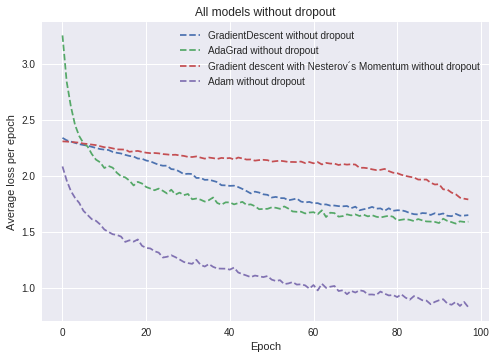

In [0]:
# Plots ommitting the first epoch.

# Plot for losses of all models without dropout.
training = False
for j in range(4):
  plt.plot(losses[1:99,j,training*1], label = names[j] + ' without dropout', color = 'C' + str(j), linestyle = '--')      
plt.ylabel('Average loss per epoch')
plt.xlabel('Epoch')
plt.title('All models without dropout')
plt.legend()
plt.show()

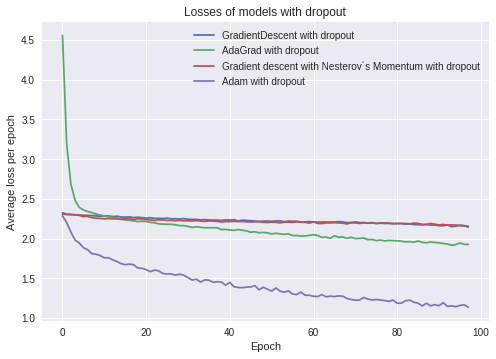

In [0]:
# Plot for losses of all models that included dropout.
training = True
for j in range(4):
  plt.plot(losses[1:99,j,training*1], label = names[j] + ' with dropout', color = 'C' + str(j), linestyle = '-')
plt.ylabel('Average loss per epoch')
plt.xlabel('Epoch')
plt.title('Losses of models with dropout')
plt.legend()
plt.show()

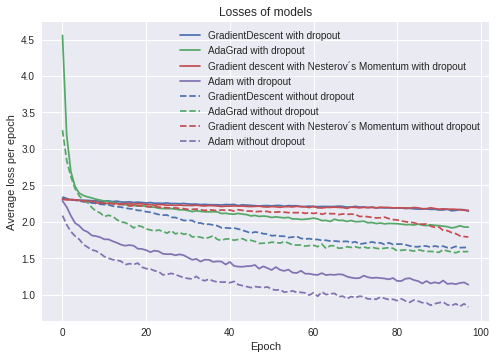

In [0]:
# Plot of losses of all models.  
for training in [True, False]:
  for j in range(4):
    if training == True:
      plt.plot(losses[1:99,j,training*1], label = names[j] + ' with dropout', color = 'C' + str(j), linestyle = '-')
    else:
      plt.plot(losses[1:99,j,training*1], label = names[j] + ' without dropout', color = 'C' + str(j), linestyle = '--')      
  plt.ylabel('Average loss per epoch')
  plt.xlabel('Epoch')
  plt.title('Losses of models')
  plt.legend()
plt.show()

### Discussion of Results

#### Results

##### Models without dropout
First of all, we note that Adam performs best starting with an average loss of 7.19 in the first epoch and decreasing to an average loss of 0.9 after 100 epochs.

All other optimizers (gradient descent, AdaGrad and gradient descent with Nesterov´s momentum) start with a higher average loss in the first period (9.0474, 7.2924 and 9.1111). The fact that AdaGrad and Adam have a remarkably lower average loss in the first period might be due to a too low starting learning rate.

Further, the models trained with an optimizer that is not Adam achieved only losses that are twice as big as those achieved by Adam after 100 epochs. That is around 1.68 for training with gradient descent, around 1.63 for training with AdaGrad and 1.8 for training with gradient descent with Nesterov's momentum. The last optimizer performs thus worst with respect to loss minimization, although it initially has a much lower loss than AdaGrad.

The loss for the model trained with AdaGrad has the steepest decline in the first 3 epochs from over 3.2 to 2.3. Adam already starts with a really low loss and the loss curve is flat afterwards as had been the case in Exercise 1. In contrast to the first problem, though, the loss in the models trained with gradient descent and gradient descent with Nesterov's momentum does not decrease substantially. The loss curve of the model trained with gradient descent with Nesterov's momentum is even concave. 

The computational time that the models take in total to train ranges from 126 to 134 seconds.

##### Models with dropout

With dropout, all optimizers perform considerably worse. AdaGrad again starts with the highest average loss of 16 in the first epoch. Within three epochs the loss of the model opitmized with AdaGrad decreases sharply to 2.3. In subsequent epochs the loss only adjusts slowly to a final loss of nearly 2. Surprisingly, both the gradient descent methods start with an average loss that is lower than before (6.65 and 8.07 compared to 9.04 and 9.11 for vanilla and momentum mini-batch gradient descent). The loss of both models only decreases slowly to a final value of 2.2. The loss curves of the models trained with either gradient descent or gradient descent with Nesterov's momentum are even flatter than before and can hardly be separated from the second epoch on. Both algorithms perform worst in this setting. Using Adam, in contrast, results again in the lowest average loss of 1.2 after 100 epochs. 

Last but not least, the computational time of all models to train increases to a range of 137 to 155 seconds, which implies an increase of over 8%. This had been expected as additional (dropout) layers are applied.

#### Interpretation
Again, Adam performs the best due to its combination of momentum and adaptive learning rate. The loss of the models with AdaGrad converges only really slowly which might be explained by the low starting learning rate, its decay and the fact that AdaGrad decreases the learning rate after each update.

Since the loss curves of both the gradient descent methods are really flat, we assume that both methods get trapped in a critical point which is not a global minimum. Neural networks often pose non-convex optimization problems which may contain saddle points. As Ruder (2016) notes, both models are susceptible of being trapped in exactly these saddle points. Further, common artificial intelligence literature states that finding only a local minimum is not as bad as finding a saddle point, since the local minima of loss functions often have a loss comparable to the global minimum (Ge et al., 2015). This is why, we suggest that the models trained with a gradient descent variant should be initialized in various ways in order to prevent such results.

Now, contrasting models with dropout to those without it, we note that dropout in general increases the loss in the training set. This is intuitive since dropout is a regularization technique that *drops out* units in a neural network in order to combat overfitting. In other words, dropout reduces the fit to the train data and thus leads to higher train losses. 

Since we, however, only regard 50 mini-batches in each epoch, instead of the 391 mini-batches which cover the whole train set, we will most certainly introduce new data to the training of our model in each epoch. Although the model is trained on this new data before the loss is computed, the model was trained on different data beforehand. This is why, the average loss of each epoch incorporates partly the test loss. Therefore, the training loss does not decrease monotonously as observed in the first problem, but decreases with small fluctuations. For this reason, it is also possible that the loss of a model with dropout is slightly lower than the loss of a model without dropout.

In general we can state that the losses in this problem are really high, especially compared to the minimum losses achieved in the third problem. Further, the losses change a lot each time the code is re-run. Weight initilization is therefore a critical issue in this exercise.



## P3. CIFAR10 Image Classification

### Task

Design and implement a convolutional neural network for the CIFAR10 image classification task aiming to achieve a high test accuracy. Evaluate the classification accuracy by reporting top-1 and top-5 test error rates. 

**Task:** plot the average loss, top-1 error rate and top-5 error rate per epoch versus the number of epochs for the training and the test dataset. 
Make sure to well describe and justify your network architecture design choices. 

Notice here that SGD, Momentum, and NAG find it difficulty to break symmetry, although the latter two eventually manage to escape the saddle point, while Adagrad, RMSprop, and Adadelta quickly head down the negative slope, with Adadelta leading the charge.



### Discussion and Presentation of Some Results

Given the circumstances of the assignment our goal here is to find a CNN model that optimizes the test accuracy of the CIFAR10 data set in less than three hours using keras.

In the following, we first analyze how we process the input of the CNNs, how we define the general setting of the CNNs and how we design the network architectures. Subsequently, we summarize our findings, discuss them and conclude. Our code and most of the results are displayed in the last part.

#### 1. General Framework

In the following we describe the data processing techniques and the general framework in which we train the different network architectures. Using the same setting for testing each network architecture ensures that one network architecture does not outperform other ones because of a better optimizer. However, our framework might favour special network architectures over others. This is why we tried different settings for different architectures, but only present the results for our general framework.

First of all, we standardize the training data by substracting its mean and dividing by its standard deviation in each dimension. Accordingly, we normalize the test data also using the statistics of the train data. Normalization is necessary to obtain similarly-ranged feature values and to improve gradient-based optimization methods.

After trying out different hyperparameter configurations for a setting of 30 epochs, we noted that most of our models achieved the highest accuracy rates for a batch size of 64, a starting learning rate of 0.0001, a decay of the learning rate of 1e-6, and a kernel regularization parameter of 1e-4. We tried batch sizes of 64, 128 and 256, starting learning rates of 0.01, 0.001 and 0.0001, and decay in learning rates and regularization parameters of 1e-6 and 1e-4.

According to the results of problems 1 and 2, we assume that Adam will also work best in our setting. We also tried RMSProp since this algorithm is even more efficient, but since the final error rates turned out around 1% higher with the latter algorithm, we compared all network architectures using Adam for loss minimization.

Because of time contraints, we present all models only for a number of epochs of 10, 30 or 70.

#### 2. Network Architecture Design


In a first step, we implemented some baseline network architectures as follows:
* the network architecture introduced in Exercise 2,
* DeepCNet(5,300) as introduced by Graham (2014b),
* a CNN model posted by Kumar (2018) which was earlier published by Giovenale (2018),
* All-CNN-C as introduced by Springberg et al. (2014) and
* the architecture using networks in networks as proposed by Lin et al. (2013).

We implemented all models as published, but adjusted them to our general framework. Please refer to the last part in this notebook for an overview of the baseline architectures.

In a next step, we adjusted the models using different methods. We either used
* kernel or activitvity regulizers,
* batch normalization,
* overlapping pooling (Krizhevsky et al., 2012),
* dense layers before the output layer,
* max pooling layers,
* different weight initializers,
* different numbers of units per convolutional layer,
* dropout layers or
* MLP convolutional layers.

In each run, we only changed one characteristic. This approach allows fast ceteris-paribus analysis. If changing one characteristic led to inferior performance, we did not implement that change in further models. This approach, though fast, is insufficient since some characteristics interact. For example, including a dense layer might decrease the performance of a model due to overfitting, while a sole dropout layer cannot be included. But adding a dense layer and an additional dropout layer might increase the performance of a model.


#### 3. Discussion of Most Important Results


![results](https://drive.google.com/file/d/1_HL63okfIN18ne4nVl18P1yvZ1jW30dC/view)

Please refer to the [attached image](https://drive.google.com/file/d/1_HL63okfIN18ne4nVl18P1yvZ1jW30dC/view) "results" for a table of the results of all models that were trained in the setting as discussed in the previous paragraph. The table shows the range of the loss/top-1 accuracy/top-5 accuracy  in the last five trained epochs for each model. The number in brackets is the final loss/top-1 accuracy/ top-5 accuracy.

We only discuss the most important results in this paragraph. Please refer to the last part in the notebook for more detailed results. 

Initially, we compare the performance of all of our baseline models. Since All-CNN-C and the NiN model perform worst, we omit them in our further analysis. Among the model from Exercise 2, DeepCNet(5,300) and the model discussed by Kumar (2018), DeepCNet(5,300) performs the best as can been seen in the following graph.



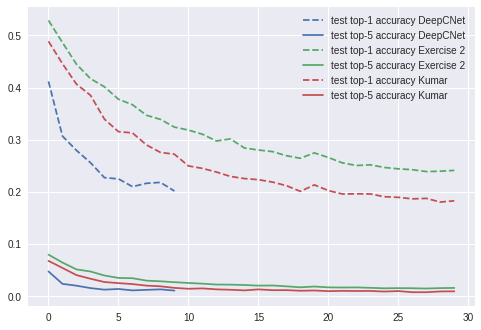

In [10]:
i = 0
plt.plot(1 - np.asarray(DeepCNet_hist['val_top1']), label = 'test top-1 accuracy DeepCNet', color = 'C' + str(i), linestyle = '--') 
plt.plot(1 - np.asarray(DeepCNet_hist['val_top5']), label = 'test top-5 accuracy DeepCNet', color = 'C' + str(i), linestyle = '-') 
i = i + 1
plt.plot(1 - np.asarray(Exe2_hist['val_top1']), label = 'test top-1 accuracy Exercise 2', color = 'C' + str(i), linestyle = '--') 
plt.plot(1 - np.asarray(Exe2_hist['val_top5']), label = 'test top-5 accuracy Exercise 2', color = 'C' + str(i), linestyle = '-') 
i = i + 1
plt.plot(1 - np.asarray(model_hist['val_top1']), label = 'test top-1 accuracy Kumar', color = 'C' + str(i), linestyle = '--') 
plt.plot(1 - np.asarray(model_hist['val_top5']), label = 'test top-5 accuracy Kumar', color = 'C' + str(i), linestyle = '-') 
i = i + 1

plt.legend()
plt.show()

After only ten epochs, the top-1 error rate is reduced to nearly 20%, while the model of Exercise 2 resp. the model of Kumar (2018) still suffer from an error rate of 35% resp. 28%. The model from Exercise 2 performs the worst with a final top-1 resp. top-5 error rate of 77% resp. 98.46%. In general, we note that shallow architectures perform worse than large deep networks.

In the following, we present the network architecture that performed the best in our standard setting. We trained the model on 70 epochs with all other parameters unchanged. 


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
activation_71 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
activation_72 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 128)       0         
__________

In [0]:
# Model by Kumar(2018) with overlapping pooling, 
# dense layer before the output layer and
# and even more units per convolutional layer.

####
#### First run the code under Implementation and Detailed Results/General Framework
####

model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization()) ###

model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(256, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.3)) # reduce that
 
model.add(Conv2D(512, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

‚‚
save_object(model_hist, 'model_best1.pkl')

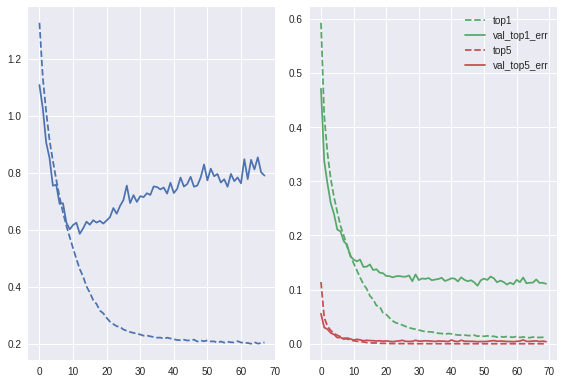

In [0]:
plot_this(model_hist, num_epochs = 70)

As we see, we achieve a top-1 accuracy of nearly 90% with this network architecture by only considering 70 epochs. The smallest test top-1 resp. the smallest test top-5 accuracy of the last ten epochs are 88.34% resp. 99.50%. The highest accuracies of the last ten epochs are 89% resp. 99.61%. Our test loss is around 75%.

We see that the validation loss increases from the tenth epoch on and that our error rates stay nealy constant after 50 epochs. This suggests that our model strongly overfits the data. Even lower error rates could thus have been achieved by using more regularization techniques like data augmentation.






#### 4. Conclusion


In general, we note that deeper and larger networks are necessary for classifying images. This roots from the fact that these models are better in grasping various layers of abstraction (Kumar, 2018). However, larger networks are harder to train since the number of parameters increases and they require greater data input. Therefore, regularization techniques are crucial to avoid overfitting.

In the Kaggle competition "CIFAR-10 - Object Recognition in Images" in 2014, DeepCNet achieved a test accuracy of over 95%. This suggests that we could have decreased our test error rates by learning more epochs. Due to the lack of GPU resources, not more than 70 epochs could be calculated in each model, while a number of 300 epochs is often necessary to achieve even better results.

If more time had been given, possible extensions could have included using
*   fractional max-pooling (Graham, 2014a),
*   an ensemble of multiple neural network architectures (Singh et al., 2016),
*   data augmentation methods like ZSA whitening (Lin et al., 2013; Goodfellow et al., 2013),
*  more careful hyperparameter tuning and 
* increased efforts in combatting overfitting.

In the task, we were explicitely asked to implement convolutional neural networks. However, deep residual networks could allow more efficient computing such that we could achieve even lower error rates (He et al., 2016). 












### Implementation and Detailed Results


#### General Framework
The following code makes the necessary imports, processes the data and serves as a skeleton for all further models applied.

In the following one line per epoche is printed out. For 30 epochs this results in long output windows. Change verbosity to 0 in lines 85 to 89 to omit these outputs. Please note that we ue the test data as validation data set such that each line printed out presents the train loss, the top-5 train accuracy, the top-1 train accuracy, the test loss, the top-5 test accuracy and the top-1 test accuracy.

The left plot under the output lines presents the train and the test loss (solid and dashed line), while the right plot presents the top-5 train and the test error rate (red line) and the top-1 train and the test error rate.

In [1]:
# Imports.
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
import functools

import keras
from keras.regularizers import l2
from keras.utils import np_utils
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import LearningRateScheduler

# Download the data.
from keras.datasets import cifar10
(data_train, label_train), (data_test, label_test) = cifar10.load_data()
num_train, img_rows, img_cols, img_channels =  data_train.shape
num_classes = 10
label_train = keras.utils.to_categorical(label_train, num_classes)
label_test = keras.utils.to_categorical(label_test, num_classes)

# Download the data.
mean = np.mean(data_train, axis=(0,1,2,3))
std = np.std(data_train, axis=(0,1,2,3))
data_train = (data_train - mean)/(std + 1e-7)
data_test = (data_test - mean)/(std + 1e-7)

# Data augmentation.
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1,
    height_shift_range=0.1, horizontal_flip=True)
datagen.fit(data_train)

# Create top-1 and top-5 accuracy rate metrics. 
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)
top5_acc.__name__ = 'top5'

top1_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=1)
top1_acc.__name__ = 'top1'


# Function plot_this.
# Input:  history    - history of fitted model in keras. 
#         num_epochs - number of epochs of model.
# Output: plots of the loss, top-1 and top-5 error rates for train and test data in each epoch.

def plot_this(history, num_epochs = 30):
  # Plots.
  metric = 'loss'
  plt.subplot(1, 2, 1)
  plt.plot(history[metric][1:(num_epochs-1)], label = metric, color = 'C' + str(0), linestyle = '--') 
  plt.plot(history['val_' + metric][1:(num_epochs-1)], label = 'val_' + metric, color = 'C' + str(0), linestyle = '-') 
  
  i = 1
  plt.subplot(1, 2, 2)
  for metric in ['top1', 'top5']:
    plt.plot(1 - np.asarray(history[metric]), label = metric, color = 'C' + str(i), linestyle = '--') 
    plt.plot(1 - np.asarray(history['val_' + metric]), label = 'val_' + metric + '_err', color = 'C' + str(i), linestyle = '-') 
    i = i + 1
    
  plt.legend()
  plt.tight_layout()
  plt.show()


# Function run.
# Input:  model         - a CNN model. 
#         learning_rate - learning rate of optimizer.
#         decay         - decay of the learning rate.
#         opt           - optimizer.
#         num_epochs    - number of epochs.
#         batch_size    - batch size.
# Output: plots of the loss, top-1 and top-5 error rates as generate by plot_this().
#         prints out one progress bar per epoch and the current loss and top-1 and top-5 accuracy.

def run(model, learning_rate, decay, opt, num_epochs, batch_size, data_aug = False):
  
  # Run model.
  if opt == 'keras.optimizers.SGD':
    model.compile(optimizer = opt(lr = learning_rate, decay = decay, momentum = 0.9), loss = 'categorical_crossentropy', metrics = [top5_acc, top1_acc])
  else:
    model.compile(optimizer = opt(lr = learning_rate, decay = decay), loss = 'categorical_crossentropy', metrics = [top5_acc, top1_acc])
  
  # Model fit dependent of use of data augmentation.
  if data_aug == False:
    fitted_model = model.fit(data_train, label_train, batch_size=batch_size, epochs=num_epochs, shuffle=True, validation_data = (data_test, label_test))
  else:
    fitted_model = model.fit_generator(datagen.flow(data_train, label_train, batch_size=batch_size), steps_per_epoch=np.ceil(num_train / batch_size), epochs=num_epochs, shuffle=True, validation_data=(data_test, label_test))

  # Plots.
  plot_this(fitted_model.history)
  
  return (fitted_model.history)

Using TensorFlow backend.


170500096/170498071 [==============================] - 24s 0us/step


#### Model from Exercise 2 of this assignment

Initially, we implement the baseline model of Exercise 2, which is summarized as follows:

In [3]:
Exe2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          25632     
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 15s 300us/step - loss: 1.7421 - top5: 0.8550 - top1: 0.3645 - val_loss: 1.4837 - val_top5: 0.9203 - val_top1: 0.4714
Epoch 2/30
50000/50000 [==============================] - 15s 309us/step - loss: 1.4659 - top5: 0.9213 - top1: 0.4726 - val_loss: 1.3618 - val_top5: 0.9355 - val_top1: 0.5139
Epoch 3/30
50000/50000 [==============================] - 12s 242us/step - loss: 1.3594 - top5: 0.9369 - top1: 0.5129 - val_loss: 1.2648 - val_top5: 0.9486 - val_top1: 0.5554
Epoch 4/30
50000/50000 [==============================] - 12s 231us/step - loss: 1.2774 - top5: 0.9444 - top1: 0.5430 - val_loss: 1.1837 - val_top5: 0.9526 - val_top1: 0.5830
Epoch 5/30
50000/50000 [==============================] - 12s 237us/step - loss: 1.2131 - top5: 0.9522 - top1: 0.5682 - val_loss: 1.1310 - val_top5: 0.9603 - val_top1: 0.5987
Epoch 6/30
50000/50000 [==============================] - 12s 235us/step - 

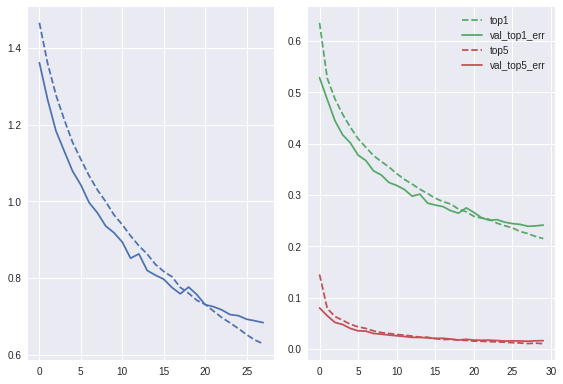

In [4]:
# Model from Exercise 2.

Exe2 = Sequential()

Exe2.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(img_rows,img_cols,3),padding='same'))
Exe2.add(MaxPooling2D((2, 2),strides=2,padding='same'))
Exe2.add(Dropout( rate = 0.2))

Exe2.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(img_rows,img_cols,3),padding='same'))
Exe2.add(MaxPooling2D((2, 2),strides=2,padding='same'))
Exe2.add(Dropout(rate = 0.2))

Exe2.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(img_rows,img_cols,3),padding='same'))
Exe2.add(MaxPooling2D((2, 2),strides=2,padding='same'))
Exe2.add(Dropout(rate = 0.2))

Exe2.add(Flatten())
Exe2.add(Dense(1000))
Exe2.add(Activation('relu'))

Exe2.add(Dense(num_classes))
Exe2.add(Activation('softmax'))

Exe2_hist = run(model = Exe2, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 30, batch_size = 64)

save_object(Exe2_hist, 'Exe2_hist1.pkl')

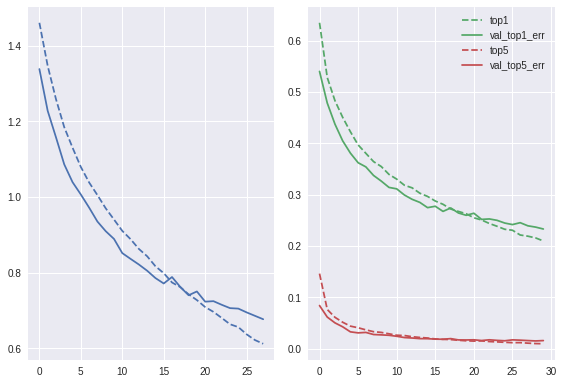

In [0]:
plot_this(Exe2_hist)

State-of-the-art neural networks achieve a test top-1 error rate of less than 5%. Compared to these methods, this CNN performs really poorly with an accuracy of less than 77% after 30 epochs. One possible reason is surely the small number of epochs. We see that the slopes of all curves are (highly) negative which suggests that further training would have increased test accuracy significantly. 

Another possible reason for this might be overfitting.
In order to overcome this, we also try to add l2 kernel regulizers.

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 18s 355us/step - loss: 5.2911 - top5: 0.8537 - top1: 0.3611 - val_loss: 3.2612 - val_top5: 0.9169 - val_top1: 0.4504
Epoch 2/30
50000/50000 [==============================] - 17s 341us/step - loss: 2.6950 - top5: 0.9181 - top1: 0.4590 - val_loss: 2.2680 - val_top5: 0.9252 - val_top1: 0.4909
Epoch 3/30
50000/50000 [==============================] - 16s 326us/step - loss: 2.0647 - top5: 0.9315 - top1: 0.4992 - val_loss: 1.8493 - val_top5: 0.9430 - val_top1: 0.5417
Epoch 4/30
50000/50000 [==============================] - 16s 318us/step - loss: 1.7994 - top5: 0.9393 - top1: 0.5227 - val_loss: 1.6775 - val_top5: 0.9504 - val_top1: 0.5458
Epoch 5/30
50000/50000 [==============================] - 16s 322us/step - loss: 1.6601 - top5: 0.9444 - top1: 0.5375 - val_loss: 1.5995 - val_top5: 0.9458 - val_top1: 0.5488
Epoch 6/30
50000/50000 [==============================] - 16s 320us/step - 

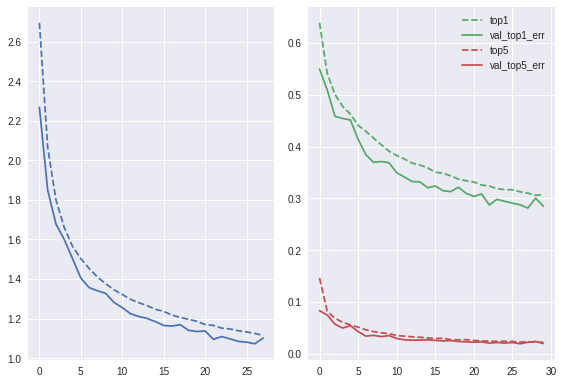

In [0]:
# Model from Exercise 2 with l2 kernel regulizers.

Exe2 = Sequential()

Exe2.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.01)))
Exe2.add(MaxPooling2D((2, 2),strides=2,padding='same'))
Exe2.add(Dropout( rate = 0.2))

Exe2.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.01)))
Exe2.add(MaxPooling2D((2, 2),strides=2,padding='same'))
Exe2.add(Dropout(rate = 0.2))

Exe2.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.01)))
Exe2.add(MaxPooling2D((2, 2),strides=2,padding='same'))
Exe2.add(Dropout(rate = 0.2))

Exe2.add(Flatten())
Exe2.add(Dense(1000,kernel_regularizer=l2(0.01)))
Exe2.add(Activation('relu'))

Exe2.add(Dense(num_classes))
Exe2.add(Activation('softmax'))

Exe2_hist = run(model = Exe2, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 30, batch_size = 64)

save_object(Exe2_hist, 'Exe2_hist2.pkl')

Adding a kernel regulizer (on the weights of each layer) lets the validation loss decrease faster. The minimum level of the error rates however does not change. Thus convergence is much faster.
The model performance decreases to an accuracy of less than 72% after 30 epochs. Apparently, overfitting was not an issue in this setting.

We compare our results with the same model as before, but instead of kernel regulizers, which are directly applied on the weights, we use activity regulizers. This leads however to even higher error rates.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 20s 404us/step - loss: 18.5642 - top5: 0.5979 - top1: 0.1499 - val_loss: 5.0151 - val_top5: 0.5329 - val_top1: 0.1327
Epoch 2/30
50000/50000 [==============================] - 14s 280us/step - loss: 3.7207 - top5: 0.6890 - top1: 0.1837 - val_loss: 2.9096 - val_top5: 0.7716 - val_top1: 0.2013
Epoch 3/30
50000/50000 [==============================] - 15s 291us/step - loss: 2.5244 - top5: 0.8173 - top1: 0.2464 - val_loss: 2.2516 - val_top5: 0.8516 - val_top1: 0.3001
Epoch 4/30
50000/50000 [==============================] - 16s 312us/step - loss: 2.1107 - top5: 0.8673 - top1: 0.3169 - val_loss: 1.9767 - val_top5: 0.8883 - val_top1: 0.3463
Epoch 5/30
500

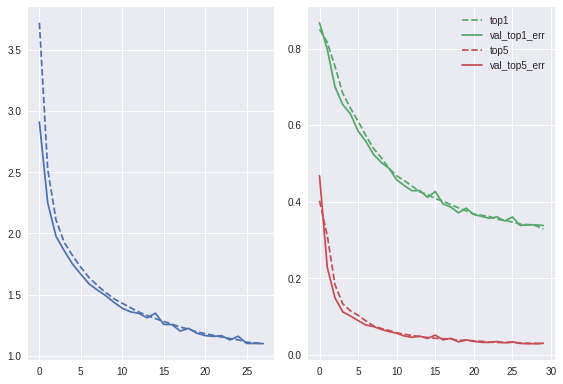

In [0]:
# Model from Exercise 2 with l2 activity regulizers.

Exe2 = Sequential()

Exe2.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(img_rows,img_cols,3),padding='same',activity_regularizer=l2(0.001)))
Exe2.add(MaxPooling2D((2, 2),strides=2,padding='same'))
Exe2.add(Dropout( rate = 0.2))

Exe2.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(img_rows,img_cols,3),padding='same',activity_regularizer=l2(0.001)))
Exe2.add(MaxPooling2D((2, 2),strides=2,padding='same'))
Exe2.add(Dropout(rate = 0.2))

Exe2.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(img_rows,img_cols,3),padding='same',activity_regularizer=l2(0.001)))
Exe2.add(MaxPooling2D((2, 2),strides=2,padding='same'))
Exe2.add(Dropout(rate = 0.2))

Exe2.add(Flatten())
Exe2.add(Dense(1000,activity_regularizer=l2(0.001)))
Exe2.add(Activation('relu'))

Exe2.add(Dense(num_classes))
Exe2.add(Activation('softmax'))

Exe2_hist = run(model = Exe2, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 30, batch_size = 64)

save_object(Exe2_hist, 'Exe2_hist3.pkl')

Our top-1 accuracy decreases to under 67% after 30 epochs. Apparently, the model introduced in Exercise 2 is underfitting. For this reason, we implement deeper models in the following.

#### DeepCNet
Apparently, the shallow network proposed in Exercise 2 underfits the model when only trained for 30 epochs and thus performs really poorly. State-of-the-art methods employ really deep networks for image classification as we will see in the following. One model that won the Kaggle competition on image classification of CIFAR10 is the DeepCNet(5,300) as proposed by Graham (2014b). Its idea is to stack convolutional layers and pooling layers of size (2,2) in turn. It achieves an accuracy of 95%. We implement it in our setting of 30 epochs of mini-batch size 64 using the Adam optimizer.

The model is summarized in the following:

In [7]:
DeepCNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 300)       8400      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 300)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 300)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 600)       720600    
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 600)       0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 600)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 600)         0         
__________

Several papers record that overfitting especially occurs in later layers and is not so significant in initial layers. This is why, we let dropout rates and weight decay parameters increase in higher layers.

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 169s 3ms/step - loss: 1.8844 - top5: 0.9056 - top1: 0.4583 - val_loss: 1.5003 - val_top5: 0.9559 - val_top1: 0.6011
Epoch 2/10
50000/50000 [==============================] - 166s 3ms/step - loss: 1.4081 - top5: 0.9670 - top1: 0.6297 - val_loss: 1.2901 - val_top5: 0.9774 - val_top1: 0.6706
Epoch 3/10
50000/50000 [==============================] - 165s 3ms/step - loss: 1.2055 - top5: 0.9789 - top1: 0.7064 - val_loss: 1.1671 - val_top5: 0.9832 - val_top1: 0.7199
Epoch 4/10
50000/50000 [==============================] - 166s 3ms/step - loss: 1.0729 - top5: 0.9850 - top1: 0.7533 - val_loss: 1.1074 - val_top5: 0.9846 - val_top1: 0.7425
Epoch 5/10
50000/50000 [==============================] - 166s 3ms/step - loss: 0.9721 - top5: 0.9893 - top1: 0.7870 - val_loss: 1.1280 - val_top5: 0.9810 - val_top1: 0.7428
Epoch 6/10
50000/50000 [==============================] - 166s 3ms/step - loss: 

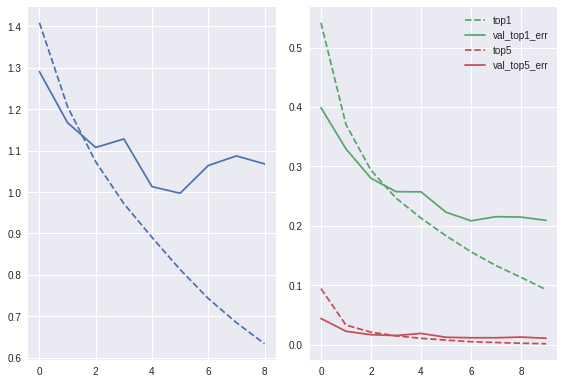

In [17]:
# DeepCNet(5,300).

DeepCNet = Sequential()

DeepCNet.add(Conv2D(300, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNet.add(Activation('elu'))
DeepCNet.add(MaxPooling2D(pool_size=(2,2),padding='same'))

DeepCNet.add(Conv2D(600, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNet.add(Activation('elu'))
DeepCNet.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNet.add(Dropout(0.1))
 
DeepCNet.add(Conv2D(900, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNet.add(Activation('elu'))
DeepCNet.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNet.add(Dropout(0.2))

DeepCNet.add(Conv2D(1200, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNet.add(Activation('elu'))
DeepCNet.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNet.add(Dropout(0.3))
 
DeepCNet.add(Conv2D(1500, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNet.add(Activation('elu'))
DeepCNet.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNet.add(Dropout(0.4))

DeepCNet.add(Conv2D(1800, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNet.add(Activation('elu'))
DeepCNet.add(Dropout(0.5))

DeepCNet.add(Flatten())
DeepCNet.add(Dense(num_classes, activation='softmax'))

DeepCNet_hist = run(model = DeepCNet, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 10, batch_size = 64)

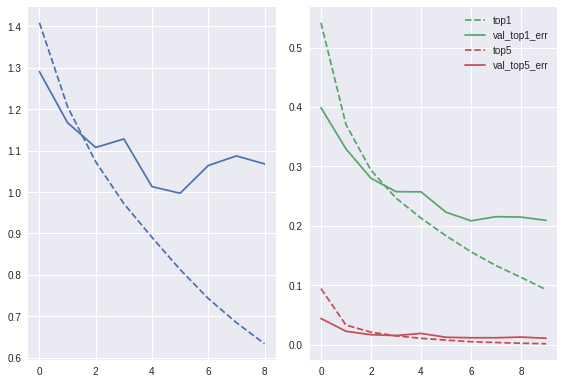

In [19]:
plot_this(DeepCNet_hist)

Since the network is so deep and has millions of parameters to compute, it takes a long time to train. Accordingly, we can only train 10 epochs because of time constraints. However, this network architecture already performs significantly better than that proposed before. We achieve a top-1 accuracy of over 78% after only 10 epochs. The huge size of the network results in fast learning. As we see the slopes of the train loss curve and the top-1 train error rate curve are highly negative. Graham (2014b) achieves a test error of only 8.37% with this model by training more epoches.


The large fluctuations and the increasing difference between the test and the train loss as well as the test and the train accuracy let us suggest that the DeepCNet suffers from large overfitting which is not surprising considering the many large layers. For this reason, we include batch normalization layers. These layers normalize the output of the previous activation layers such that they avoid internal covariate shifting and also act as regularization technique.

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 192s 4ms/step - loss: 2.3111 - top5: 0.8891 - top1: 0.4185 - val_loss: 2.0023 - val_top5: 0.9519 - val_top1: 0.5245
Epoch 2/10
50000/50000 [==============================] - 188s 4ms/step - loss: 1.7437 - top5: 0.9561 - top1: 0.5852 - val_loss: 1.7585 - val_top5: 0.9627 - val_top1: 0.6211
Epoch 3/10
50000/50000 [==============================] - 188s 4ms/step - loss: 1.4875 - top5: 0.9716 - top1: 0.6697 - val_loss: 1.5428 - val_top5: 0.9781 - val_top1: 0.6700
Epoch 4/10
50000/50000 [==============================] - 188s 4ms/step - loss: 1.3246 - top5: 0.9809 - top1: 0.7217 - val_loss: 1.3975 - val_top5: 0.9826 - val_top1: 0.7210
Epoch 5/10
50000/50000 [==============================] - 188s 4ms/step - loss: 1.1916 - top5: 0.9866 - top1: 0.7642 - val_loss: 1.2005 - val_top5: 0.9852 - val_top1: 0.7752
Epoch 6/10
50000/50000 [==============================] - 188s 4ms/step - loss: 

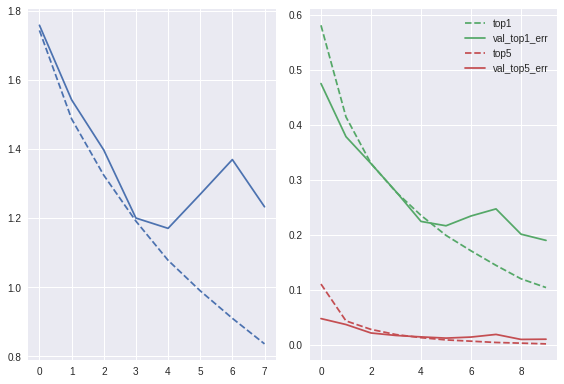

In [0]:
# DeepCNet(5,300) using batch normalization.

DeepCNet = Sequential()

DeepCNet.add(Conv2D(300, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNet.add(Activation('elu'))
DeepCNet.add(BatchNormalization()) 
DeepCNet.add(MaxPooling2D(pool_size=(2,2),padding='same'))

DeepCNet.add(Conv2D(600, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNet.add(Activation('elu'))
DeepCNet.add(BatchNormalization())
DeepCNet.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNet.add(Dropout(0.1))
 
DeepCNet.add(Conv2D(900, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNet.add(Activation('elu'))
DeepCNet.add(BatchNormalization())
DeepCNet.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNet.add(Dropout(0.2))

DeepCNet.add(Conv2D(1200, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNet.add(Activation('elu'))
DeepCNet.add(BatchNormalization())
DeepCNet.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNet.add(Dropout(0.3))
 
DeepCNet.add(Conv2D(1500, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNet.add(Activation('elu'))
DeepCNet.add(BatchNormalization())
DeepCNet.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNet.add(Dropout(0.4))

DeepCNet.add(Conv2D(1800, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNet.add(Activation('elu'))
DeepCNet.add(Dropout(0.5))

DeepCNet.add(Flatten())
DeepCNet.add(Dense(num_classes, activation='softmax'))

DeepCNet_hist = run(model = DeepCNet, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 10, batch_size = 64)

save_object(DeepCNet_hist, 'DeepCNet_hist2.pkl')

The incorporation of batch normalization leads to a higher accuracy. The new model outperforms the test accuracy of the old model by absolutely 2% after only 10 epochs. So overfitting was indeed an issue.

Graham (2014b) also incorporates MLP convolutional layers as proposed by Lin et al. (2014). These layers also serve regularization pruposes and can thus make batch normalization unnecessary.

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 171s 3ms/step - loss: 1.8884 - top5: 0.9052 - top1: 0.4547 - val_loss: 1.4954 - val_top5: 0.9588 - val_top1: 0.5979
Epoch 2/10
50000/50000 [==============================] - 165s 3ms/step - loss: 1.4057 - top5: 0.9673 - top1: 0.6324 - val_loss: 1.2386 - val_top5: 0.9779 - val_top1: 0.6948
Epoch 3/10
50000/50000 [==============================] - 166s 3ms/step - loss: 1.2054 - top5: 0.9788 - top1: 0.7068 - val_loss: 1.1624 - val_top5: 0.9804 - val_top1: 0.7230
Epoch 4/10
50000/50000 [==============================] - 165s 3ms/step - loss: 1.0795 - top5: 0.9845 - top1: 0.7494 - val_loss: 1.1224 - val_top5: 0.9819 - val_top1: 0.7365
Epoch 5/10
50000/50000 [==============================] - 166s 3ms/step - loss: 0.9764 - top5: 0.9894 - top1: 0.7864 - val_loss: 1.0491 - val_top5: 0.9849 - val_top1: 0.7648
Epoch 6/10
50000/50000 [==============================] - 166s 3ms/step - loss: 

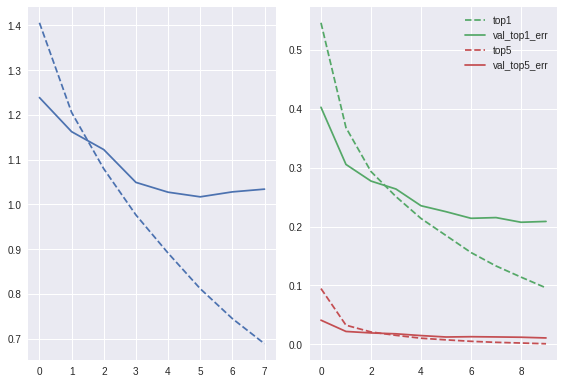

In [0]:
# DeepCNiN as in Graham(2014).

DeepCNiN = Sequential()

DeepCNiN.add(Conv2D(300, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNiN.add(Activation('elu'))
DeepCNiN.add(MaxPooling2D(pool_size=(2,2),padding='same'))

DeepCNiN.add(Conv2D(600, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNiN.add(Activation('elu'))
DeepCNiN.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNiN.add(Dropout(0.1))
 
DeepCNiN.add(Conv2D(900, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNiN.add(Activation('elu'))
DeepCNiN.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNiN.add(Dropout(0.2))

DeepCNiN.add(Conv2D(1200, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNiN.add(Activation('elu'))
DeepCNiN.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNiN.add(Dropout(0.3))
 
DeepCNiN.add(Conv2D(1500, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNiN.add(Activation('elu'))
DeepCNiN.add(MaxPooling2D(pool_size=(2,2),padding='same'))
DeepCNiN.add(Dropout(0.4))

DeepCNiN.add(Conv2D(1800, kernel_size=(2,2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
DeepCNiN.add(Activation('elu'))
DeepCNiN.add(Dropout(0.5))

DeepCNiN.add(Flatten())
DeepCNiN.add(Dense(num_classes, activation='softmax'))

DeepCNiN_hist = run(model = DeepCNiN, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 10, batch_size = 64)

save_object(DeepCNiN_hist, 'DeepCNiN_hist.pkl')

Although DeepDNiN outperforms DeepCNet, the DeepCNet model incorporating batch normalization still performs best with a final accuracy of 80.97% compared to 79.14% (Graham (2014) achieved a top-1 test error rate of 6.28% with this model.). In our setting, batch normalization is favoured compared to MLP convolutional layers.


#### Model by Kumar (2018)

The following code implements the model proposed by Kumar (2018). The model is built as follows:

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
__________

We note that Kumar's model is similar to DeepCNet: If we decrease the number of units per convolutional layer significantly, add batch normalization, drop some max pooling layers and add one after the last convolutional layer, the network architectures are the same. Kumar (2018) thus simplifies DeepCNet which results in a drop of computational time needed per step from 184 seconds to less than one second.

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 39s 780us/step - loss: 2.2745 - top5: 0.8441 - top1: 0.3418 - val_loss: 1.4608 - val_top5: 0.9353 - val_top1: 0.5016
Epoch 2/30
50000/50000 [==============================] - 34s 682us/step - loss: 1.6971 - top5: 0.9170 - top1: 0.4563 - val_loss: 1.3057 - val_top5: 0.9447 - val_top1: 0.5560
Epoch 3/30
50000/50000 [==============================] - 34s 673us/step - loss: 1.4504 - top5: 0.9397 - top1: 0.5277 - val_loss: 1.1799 - val_top5: 0.9592 - val_top1: 0.5994
Epoch 4/30
50000/50000 [==============================] - 33s 661us/step - loss: 1.2833 - top5: 0.9539 - top1: 0.5756 - val_loss: 1.0529 - val_top5: 0.9670 - val_top1: 0.6461
Epoch 5/30
50000/50000 [==============================] - 33s 657us/step - loss: 1.1697 - top5: 0.9613 - top1: 0.6116 - val_loss: 1.0609 - val_top5: 0.9713 - val_top1: 0.6458
Epoch 6/30
50000/50000 [==============================] - 34s 674us/step - 

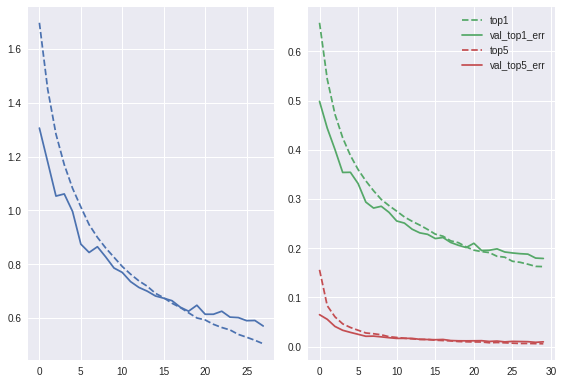

In [0]:
# Model by Kumar(2018).

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model_hist = run(model=model,learning_rate = 0.0001,decay = 1e-6,opt = keras.optimizers.adam, num_epochs=30, batch_size = 64)

save_object(model_hist, 'model_hist1.pkl')

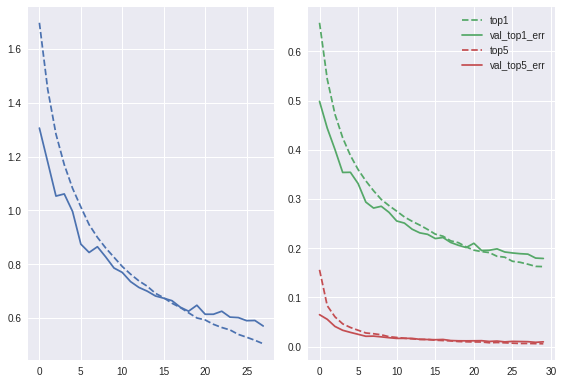

In [0]:
plot_this(model_hist)

Less complexity in the network architecture is accompanied by a decrease in test accuracy: While we achieve a top-1 accuracy of 78% with the DeepCNet(5,300), we only have an accuracy of 73% here after ten epochs. However, since this model still outperforms the baseline model of Exercise 2 (with an accuracy of only 78% compared to nearly 82% in the current model after 30 epochs) and the time for the assignment is limited, we focus on the optimization of this network architecture.

Krizhevsky et al. (2012) propose overlapping pooling in order to increase performance. This means that the max pooling filters have pool sizes of (3,3) with a stride of 2. 

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 47s 947us/step - loss: 2.3780 - top5: 0.8379 - top1: 0.3354 - val_loss: 1.5525 - val_top5: 0.9253 - val_top1: 0.4868
Epoch 2/30
50000/50000 [==============================] - 45s 893us/step - loss: 1.7195 - top5: 0.9167 - top1: 0.4581 - val_loss: 1.4388 - val_top5: 0.9446 - val_top1: 0.5327
Epoch 3/30
50000/50000 [==============================] - 48s 968us/step - loss: 1.4465 - top5: 0.9390 - top1: 0.5321 - val_loss: 1.2303 - val_top5: 0.9613 - val_top1: 0.6004
Epoch 4/30
50000/50000 [==============================] - 48s 967us/step - loss: 1.2745 - top5: 0.9540 - top1: 0.5809 - val_loss: 1.0952 - val_top5: 0.9664 - val_top1: 0.6407
Epoch 5/30
50000/50000 [==============================] - 48s 955us/step - loss: 1.1542 - top5: 0.9618 - top1: 0.6184 - val_loss: 1.0689 - val_top5: 0.9716 - val_top1: 0.6539
Epoch 6/30
50000/50000 [==============================] - 49s 981us/step - 

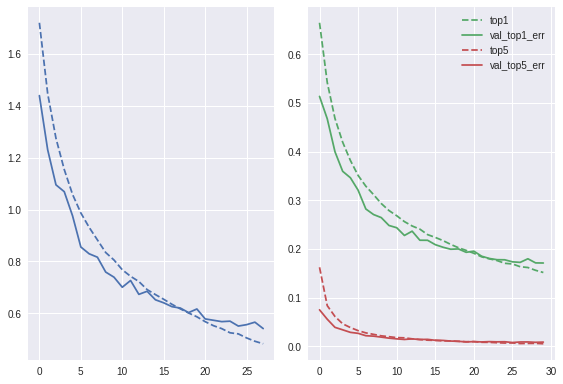

In [0]:
# Model by Kumar(2018) with overlapping pooling.

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model_hist = run(model = model, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 30, batch_size = 64)

save_object(model_hist, 'model_hist2.pkl')

We note that the validation results are now more robust and stabilize at an accuracy of over 82% after already 24 epochs. The test loss/error rate curves have only minor oscillations. This is why we will use this setting in the following. 

State-of-the-art CNNs for image classification often have several dense layers added before the output layer. We therefore add a dense layer with 1,000 units before the output layer.

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 57s 1ms/step - loss: 2.0243 - top5: 0.8300 - top1: 0.3216 - val_loss: 1.4953 - val_top5: 0.9212 - val_top1: 0.4724
Epoch 2/30
50000/50000 [==============================] - 53s 1ms/step - loss: 1.5073 - top5: 0.9205 - top1: 0.4626 - val_loss: 1.3607 - val_top5: 0.9422 - val_top1: 0.5308
Epoch 3/30
50000/50000 [==============================] - 53s 1ms/step - loss: 1.3161 - top5: 0.9437 - top1: 0.5379 - val_loss: 1.2725 - val_top5: 0.9558 - val_top1: 0.5712
Epoch 4/30
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1987 - top5: 0.9533 - top1: 0.5823 - val_loss: 1.0716 - val_top5: 0.9658 - val_top1: 0.6336
Epoch 5/30
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1080 - top5: 0.9615 - top1: 0.6177 - val_loss: 1.0009 - val_top5: 0.9692 - val_top1: 0.6609
Epoch 6/30
50000/50000 [==============================] - 53s 1ms/step - loss: 1.0381

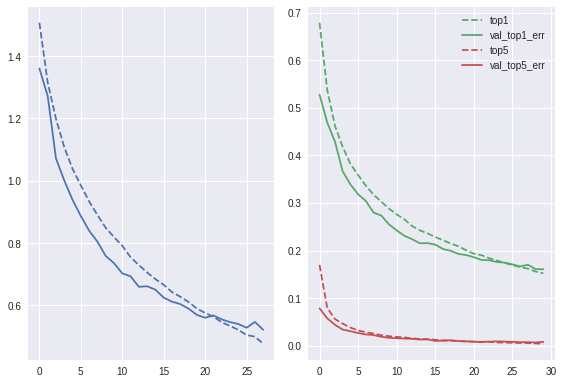

In [0]:
# Model by Kumar(2018) with overlapping pooling 
# and dense layer before the output layer.

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization()) ###

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.3)) # reduce that
 
model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model_hist = run(model=model,learning_rate = 0.0001,decay = 1e-6,opt = keras.optimizers.adam, num_epochs=30, batch_size = 64)

save_object(model_hist, 'model_hist3.pkl')

Adding a dense layer has led to a top-1 accuracy of 83.91% and a top-5 accuracy of 99.15% after 30 epochs. This is an absolute increase in top-1 accuracy of over 1%. Further, the test loss/error rate curves are now even more smoothly and their slope after 30 epochs is more negative which implies that this model has higher potential than the model proposed before.

Considering these results, we add a second convolutional layer of 1,000 units before the output layer of our model.


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 63s 1ms/step - loss: 2.4172 - top5: 0.6990 - top1: 0.2034 - val_loss: 1.7305 - val_top5: 0.8878 - val_top1: 0.3753
Epoch 2/30
50000/50000 [==============================] - 59s 1ms/step - loss: 1.8283 - top5: 0.8601 - top1: 0.3371 - val_loss: 1.5851 - val_top5: 0.9142 - val_top1: 0.4370
Epoch 3/30
50000/50000 [==============================] - 59s 1ms/step - loss: 1.6366 - top5: 0.8994 - top1: 0.4124 - val_loss: 1.4704 - val_top5: 0.9253 - val_top1: 0.4889
Epoch 4/30
50000/50000 [==============================] - 57s 1ms/step - loss: 1.4744 - top5: 0.9217 - top1: 0.4767 - val_loss: 1.2623 - val_top5: 0.9491 - val_top1: 0.5586
Epoch 5/30
50000/50000 [==============================] - 57s 1ms/step - loss: 1.3453 - top5: 0.9353 - top1: 0.5310 - val_loss: 1.1694 - val_top5: 0.9519 - val_top1: 0.5972
Epoch 6/30
50000/50000 [==============================] - 57s 1ms/step - loss: 1.2498

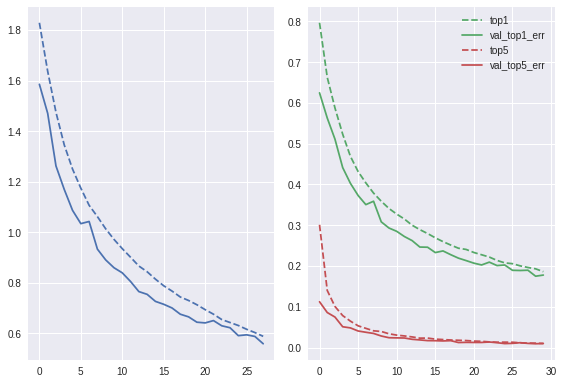

In [0]:
# Model by Kumar(2018) with overlapping pooling
# and two dense layers before the output layer.

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.7))

model.add(Dense(num_classes, activation='softmax'))

model_hist = run(model = model, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 30, batch_size = 64)

save_object(model_hist, 'model_hist5.pkl')

A second dense layer does not lead to improved error rates. The final top-1 accuracy of 82.23% and the final top-5 accuracy of 99.01% are even lower than the respective rates achieved by the model without any dense layers. 

We assume that overfitting might be a reason for the deteriorated performance. For this reason we add an additional max pooling layer after the first, the third and the fith convolutional layer.

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 30s 599us/step - loss: 2.0745 - top5: 0.7751 - top1: 0.2487 - val_loss: 2.0936 - val_top5: 0.8175 - val_top1: 0.2683
Epoch 2/30
50000/50000 [==============================] - 28s 558us/step - loss: 1.7413 - top5: 0.8853 - top1: 0.3576 - val_loss: 1.9196 - val_top5: 0.8712 - val_top1: 0.3339
Epoch 3/30
50000/50000 [==============================] - 28s 558us/step - loss: 1.6011 - top5: 0.9091 - top1: 0.4133 - val_loss: 1.8633 - val_top5: 0.8787 - val_top1: 0.3708
Epoch 4/30
50000/50000 [==============================] - 28s 562us/step - loss: 1.5076 - top5: 0.9223 - top1: 0.4524 - val_loss: 1.7366 - val_top5: 0.9089 - val_top1: 0.4155
Epoch 5/30
50000/50000 [==============================] - 28s 558us/step - loss: 1.4224 - top5: 0.9338 - top1: 0.4869 - val_loss: 1.5866 - val_top5: 0.9124 - val_top1: 0.4616
Epoch 6/30
50000/50000 [==============================] - 28s 558us/step - 

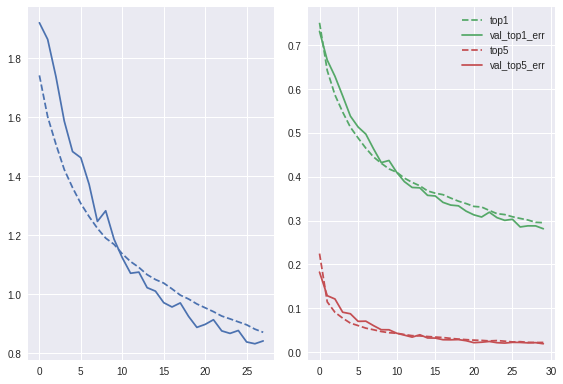

In [0]:
# Model by Kumar(2018) with overlapping pooling, 
# dense layer before the output layer
# and additional max pooling layers.

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model_hist = run(model = model, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 30, batch_size = 64)

save_object(model_hist, 'model_hist4.pkl')

Surprisingly, the top-1 accuracy decreased by over 10% compared to the model before. With only 71.85% accuracy after 30 epochs, it performs poorly compared to other models. We will thus not change the number of max pooling layers for our best model.

Instead we change the weight initializers from the default option given by keras (glorot_uniform) to truncated normal random variables.

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 55s 1ms/step - loss: 2.6623 - top5: 0.7698 - top1: 0.2600 - val_loss: 1.6976 - val_top5: 0.8964 - val_top1: 0.4092
Epoch 2/30
50000/50000 [==============================] - 50s 998us/step - loss: 1.7510 - top5: 0.8794 - top1: 0.3770 - val_loss: 1.6683 - val_top5: 0.9200 - val_top1: 0.4566
Epoch 3/30
50000/50000 [==============================] - 50s 994us/step - loss: 1.5804 - top5: 0.9123 - top1: 0.4371 - val_loss: 1.6697 - val_top5: 0.9210 - val_top1: 0.4653
Epoch 4/30
50000/50000 [==============================] - 50s 994us/step - loss: 1.4536 - top5: 0.9289 - top1: 0.4904 - val_loss: 1.4389 - val_top5: 0.9428 - val_top1: 0.5345
Epoch 5/30
50000/50000 [==============================] - 51s 1ms/step - loss: 1.3336 - top5: 0.9440 - top1: 0.5372 - val_loss: 1.1797 - val_top5: 0.9563 - val_top1: 0.5995
Epoch 6/30
50000/50000 [==============================] - 51s 1ms/step - loss: 

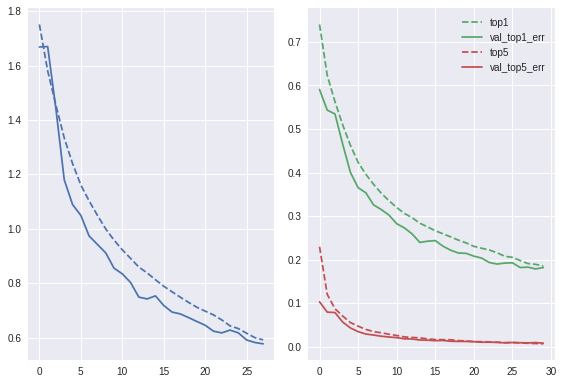

In [0]:
# Model by Kumar(2018) with overlapping pooling,
# dense layer before the output layer and
# truncated normal random variables as weight initializers.

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4), kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=121)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4), kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=122)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4), kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=123)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4), kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=124)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4), kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=125)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4), kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=126)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(1000, kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=123)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model_hist = run(model = model, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 30, batch_size = 64)

save_object(model_hist, 'model_hist6.pkl')

This change decreases the performance of our model with a final accuracy of over 83% to slightly less than 82%. Therefore, we will let the weights be initilized using the uniform distribution in the following.

As already noted, overfitting is an issue especially in later layers. For this reason, we let the kernel sizes of the convolutional layers decrease in the following with every second layer. This way later layers get larger inputs. 

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 50s 999us/step - loss: 2.0757 - top5: 0.8126 - top1: 0.2964 - val_loss: 1.5349 - val_top5: 0.9220 - val_top1: 0.4510
Epoch 2/30
50000/50000 [==============================] - 38s 754us/step - loss: 1.5854 - top5: 0.9106 - top1: 0.4260 - val_loss: 1.4396 - val_top5: 0.9390 - val_top1: 0.4991
Epoch 3/30
50000/50000 [==============================] - 39s 788us/step - loss: 1.4188 - top5: 0.9329 - top1: 0.4937 - val_loss: 1.2872 - val_top5: 0.9544 - val_top1: 0.5575
Epoch 4/30
50000/50000 [==============================] - 39s 776us/step - loss: 1.2908 - top5: 0.9480 - top1: 0.5438 - val_loss: 1.2202 - val_top5: 0.9573 - val_top1: 0.5774
Epoch 5/30
50000/50000 [==============================] - 38s 755us/step - loss: 1.2054 - top5: 0.9562 - top1: 0.5755 - val_loss: 1.0677 - val_top5: 0.9696 - val_top1: 0.6340
Epoch 6/30
50000/50000 [==============================] - 37s 735us/step - 

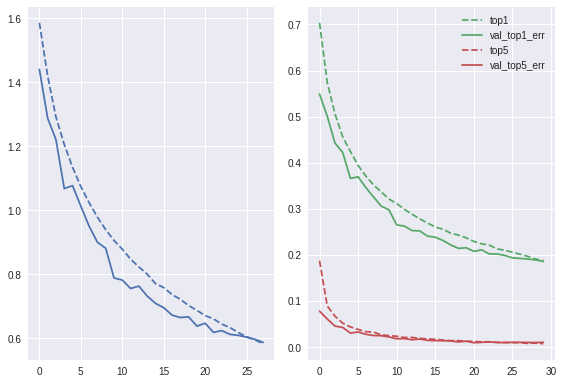

In [0]:
# Model by Kumar(2018) with overlapping pooling
# and dense layer before the output layer 
# starting with large kernel sizes which decrease per convolutioanl layer.

model = Sequential()

model.add(Conv2D(32, kernel_size=(4,4),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(4,4),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3),strides=2,padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, kernel_size=(3,3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, kernel_size=(2, 2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(2, 2),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model_hist = run(model = model, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 30, batch_size = 64)

save_object(model_hist, 'model_hist7.pkl')

The model's performance decreases slightly by absolutely 1% to 82.4% after 30 epochs. We therefore use the old kernel sizes in the following.

Instead we add an additional MLP convolutional layer as proposed by Lin et al. (2013) after the last convolutional layer in order to regularize overfitting that appears in later layers. 

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 65s 1ms/step - loss: 2.0612 - top5: 0.8220 - top1: 0.3104 - val_loss: 1.5774 - val_top5: 0.9098 - val_top1: 0.4490
Epoch 2/30
50000/50000 [==============================] - 48s 962us/step - loss: 1.5606 - top5: 0.9123 - top1: 0.4459 - val_loss: 1.3642 - val_top5: 0.9374 - val_top1: 0.5329
Epoch 3/30
50000/50000 [==============================] - 46s 924us/step - loss: 1.3645 - top5: 0.9386 - top1: 0.5231 - val_loss: 1.4402 - val_top5: 0.9427 - val_top1: 0.5326
Epoch 4/30
50000/50000 [==============================] - 45s 897us/step - loss: 1.2303 - top5: 0.9531 - top1: 0.5745 - val_loss: 1.1330 - val_top5: 0.9641 - val_top1: 0.6120
Epoch 5/30
50000/50000 [==============================] - 45s 902us/step - loss: 1.1310 - top5: 0.9626 - top1: 0.6111 - val_loss: 1.1234 - val_top5: 0.9631 - val_top1: 0.6203
Epoch 6/30
50000/50000 [==============================] - 45s 901us/step - lo

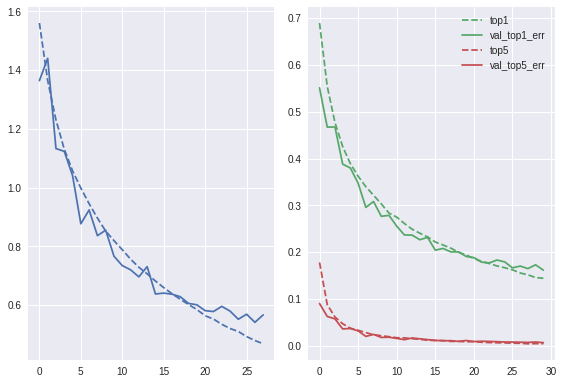

In [0]:
# Model by Kumar(2018) with overlapping pooling,
# dense layer before the output layer 
# and additional MLP convolutional layer.

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(Conv2D(100, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(Conv2D(64, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model_hist = run(model = model, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 30, batch_size = 64)
                       
save_object(model_hist, 'model_hist8.pkl')

This approach lets the accuracy of the model remain at over 83%. Since simpler models are faster to train, we will thus neglect MLP convolutional layers in the following.

Since our current network architecture resembles DeepCNet model a lot and DeepCNet achieved better results in 10 epochs than Kumar's model, we combine the benefits of both methods by increasing the number of units per layer. For this purpose, we multiply the unit number per convolutional layer by 2.

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 56s 1ms/step - loss: 1.9220 - top5: 0.8564 - top1: 0.3597 - val_loss: 1.5072 - val_top5: 0.9347 - val_top1: 0.4958
Epoch 2/30
50000/50000 [==============================] - 52s 1ms/step - loss: 1.4111 - top5: 0.9352 - top1: 0.5083 - val_loss: 1.2530 - val_top5: 0.9553 - val_top1: 0.5825
Epoch 3/30
50000/50000 [==============================] - 53s 1ms/step - loss: 1.2121 - top5: 0.9561 - top1: 0.5880 - val_loss: 1.0922 - val_top5: 0.9702 - val_top1: 0.6419
Epoch 4/30
50000/50000 [==============================] - 53s 1ms/step - loss: 1.0807 - top5: 0.9655 - top1: 0.6378 - val_loss: 1.0026 - val_top5: 0.9738 - val_top1: 0.6710
Epoch 5/30
50000/50000 [==============================] - 53s 1ms/step - loss: 0.9851 - top5: 0.9726 - top1: 0.6743 - val_loss: 0.9229 - val_top5: 0.9769 - val_top1: 0.7028
Epoch 6/30
50000/50000 [==============================] - 53s 1ms/step - loss: 0.9112

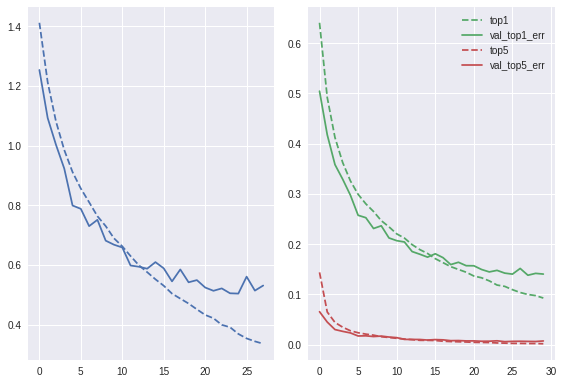

KeyboardInterrupt: ignored

In [0]:
# Model by Kumar(2018) with overlapping pooling, 
# dense layer before the output layer and
# and more units per convolutional layer.

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization()) ###

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.3)) # reduce that
 
model.add(Conv2D(256, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model_hist = run(model=model,learning_rate = 0.0001,decay = 1e-6,opt = keras.optimizers.adam, num_epochs=30, batch_size = 64)

save_object(model_hist, 'model_hist9.pkl')

Increasing the number of units per layer increased the final accuracy from 83% to nearly 86%. This increase motivates us to double the amount of units per convolutional layer a second time.

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 104s 2ms/step - loss: 1.8633 - top5: 0.8843 - top1: 0.4036 - val_loss: 1.4243 - val_top5: 0.9468 - val_top1: 0.5531
Epoch 2/30
50000/50000 [==============================] - 100s 2ms/step - loss: 1.3337 - top5: 0.9519 - top1: 0.5745 - val_loss: 1.1689 - val_top5: 0.9664 - val_top1: 0.6445
Epoch 3/30
50000/50000 [==============================] - 99s 2ms/step - loss: 1.1262 - top5: 0.9677 - top1: 0.6517 - val_loss: 0.9673 - val_top5: 0.9792 - val_top1: 0.7088
Epoch 4/30
50000/50000 [==============================] - 99s 2ms/step - loss: 1.0010 - top5: 0.9768 - top1: 0.6978 - val_loss: 0.8821 - val_top5: 0.9810 - val_top1: 0.7449
Epoch 5/30
50000/50000 [==============================] - 99s 2ms/step - loss: 0.9082 - top5: 0.9808 - top1: 0.7311 - val_loss: 0.8315 - val_top5: 0.9854 - val_top1: 0.7651
Epoch 6/30
50000/50000 [==============================] - 99s 2ms/step - loss: 0.83

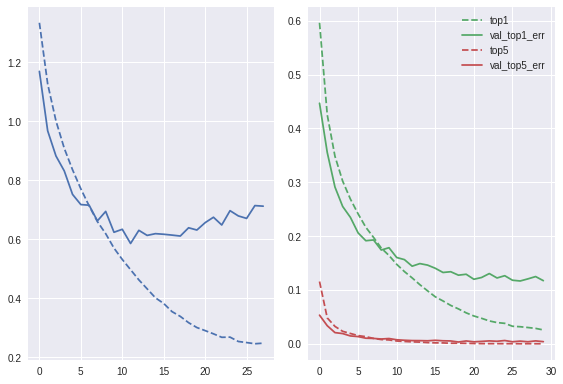

In [18]:
# Model by Kumar(2018) with overlapping pooling, 
# dense layer before the output layer and
# and even more units per convolutional layer.

model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization()) ###

model.add(Conv2D(128, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.2))
 
model.add(Conv2D(256, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.3)) # reduce that
 
model.add(Conv2D(512, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model_hist = run(model=model,learning_rate = 0.0001,decay = 1e-6,opt = keras.optimizers.adam, num_epochs=30, batch_size = 64)

And indeed the top-1 accuracy increased to 87%. We used this architecture as our best model and train it for 79 epochs where we achieved over 89% test accuracy.

Adding more units does not increase the model's performance since it is already overfitting. Instead more regularization techniques should be applied.

In the following we present two other baseline models which we did not modify as the model of Kumar (2018) outperformed them considerably.

#### All-CNN-C from Springenberg et al. (2014)

We implemented the All-CNN-C architecture proposed by Springenberg et al. (2014). This architecture achieved the lowest error rates in their setting of the CIFAR10 image classification. Its basic characteristic is that it adds several convolutional and dropout layers. Instead of using dense layers before the output layer as do most state-of-the-art classfication networks, Springenberg et al. propose adding a global averaging layer. The model looks like this:

In [16]:
allCNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_35 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
activation_37 (Activation)   (None, 16, 16, 96)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 96)        0         
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 65s 1ms/step - loss: 2.3881 - top5: 0.8131 - top1: 0.3047 - val_loss: 1.9988 - val_top5: 0.8979 - val_top1: 0.4011
Epoch 2/30
50000/50000 [==============================] - 65s 1ms/step - loss: 1.9152 - top5: 0.9077 - top1: 0.4194 - val_loss: 1.7881 - val_top5: 0.9221 - val_top1: 0.4593
Epoch 3/30
50000/50000 [==============================] - 61s 1ms/step - loss: 1.7432 - top5: 0.9269 - top1: 0.4724 - val_loss: 1.6558 - val_top5: 0.9343 - val_top1: 0.4913
Epoch 4/30
50000/50000 [==============================] - 61s 1ms/step - loss: 1.6073 - top5: 0.9381 - top1: 0.5176 - val_loss: 1.5180 - val_top5: 0.9458 - val_top1: 0.5557
Epoch 5/30
50000/50000 [==============================] - 61s 1ms/step - loss: 1.5076 - top5: 0.9468 - top1: 0.5531 - val_loss: 1.4426 - val_top5: 0.9528 - val_top1: 0.5708
Epoch 6/30
50000/50000 [==============================] - 61s 1ms/step - loss: 1.4286

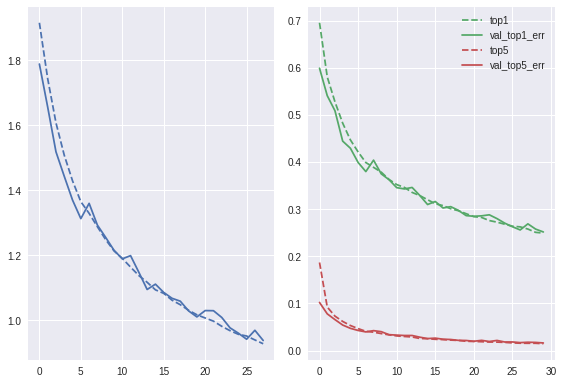

In [0]:
# All-CNN-C.
allCNN = Sequential()

# allCNN.add(Dropout(0.2))

allCNN.add(Conv2D(96, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
allCNN.add(Activation('relu'))
allCNN.add(Conv2D(96, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
allCNN.add(Activation('relu'))

allCNN.add(Conv2D(96, kernel_size=(3, 3),strides = 2,input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.0005)))
allCNN.add(Activation('relu'))
allCNN.add(Dropout(0.5))

allCNN.add(Conv2D(192, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
allCNN.add(Activation('relu'))
allCNN.add(Conv2D(192, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
allCNN.add(Activation('relu'))

allCNN.add(Conv2D(192, kernel_size=(3, 3),strides=2,input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
allCNN.add(Activation('relu'))
allCNN.add(Dropout(0.5))

allCNN.add(Conv2D(192, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
allCNN.add(Activation('relu'))

allCNN.add(Conv2D(192, kernel_size=(1, 1),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
allCNN.add(Activation('relu'))

allCNN.add(Conv2D(10, kernel_size=(1, 1),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
allCNN.add(Activation('relu'))

allCNN.add(AveragePooling2D(pool_size=(6, 6), strides=1, padding='same'))

allCNN.add(Flatten())
allCNN.add(Dense(num_classes, activation='softmax'))

allCNN_hist = run(model = allCNN, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 30, batch_size = 64)

save_object(allCNN_hist, 'allCNN_hist.pkl')

Although the slope of all test curves is obviously negative after 30 epochs, this architecture leads to a low top-1 accuracy of only 74.84%. Further, the loss as well as the test top-5 error rate are not considerably lower compared to results achieved before.

#### NiN + Dropout as in Lin et al. (2014) for the CIFAR-10 data.

Last but not least, we also implemented a CNN model incorporating MLP convolutional layers as proposed by Lin et al. (2013). In order to preserve our general framework, we forgo training 350 steps of stochastic gradient descent as was done in the paper. The architecture proposed by Lin et al. (2013) looks like this:

In [13]:
NiN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_18 (Dropout)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
activation_28 (Activation)   (None, 16, 16, 96)        0         
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 68s 1ms/step - loss: 2.5558 - top5: 0.8230 - top1: 0.3128 - val_loss: 2.1385 - val_top5: 0.9076 - val_top1: 0.4170
Epoch 2/30
50000/50000 [==============================] - 65s 1ms/step - loss: 2.0543 - top5: 0.9109 - top1: 0.4371 - val_loss: 1.9770 - val_top5: 0.9149 - val_top1: 0.4476
Epoch 3/30
50000/50000 [==============================] - 64s 1ms/step - loss: 1.8847 - top5: 0.9272 - top1: 0.4823 - val_loss: 1.9076 - val_top5: 0.9215 - val_top1: 0.4697
Epoch 4/30
50000/50000 [==============================] - 65s 1ms/step - loss: 1.7837 - top5: 0.9345 - top1: 0.5106 - val_loss: 1.7866 - val_top5: 0.9373 - val_top1: 0.5092
Epoch 5/30
50000/50000 [==============================] - 65s 1ms/step - loss: 1.7076 - top5: 0.9406 - top1: 0.5285 - val_loss: 1.7181 - val_top5: 0.9386 - val_top1: 0.5233
Epoch 6/30
50000/50000 [==============================] - 65s 1ms/step - loss: 1.6410

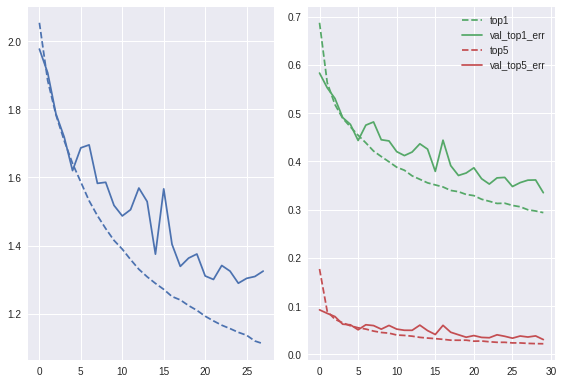

In [0]:
# NiN dropout.

NiN = Sequential()

NiN.add(Dropout(0.2))

NiN.add(Conv2D(96, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
NiN.add(Activation('relu'))
NiN.add(Conv2D(96, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
NiN.add(Activation('relu'))

NiN.add(Conv2D(96, kernel_size=(3, 3),strides = 2,input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.0005)))
NiN.add(Activation('relu'))
NiN.add(Dropout(0.5))

NiN.add(Conv2D(192, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
NiN.add(Activation('relu'))
NiN.add(Conv2D(192, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
NiN.add(Activation('relu'))

NiN.add(Conv2D(192, kernel_size=(3, 3),strides=2,input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
NiN.add(Activation('relu'))
NiN.add(Dropout(0.5))

NiN.add(Conv2D(192, kernel_size=(3, 3),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
NiN.add(Activation('relu'))

NiN.add(Conv2D(192, kernel_size=(1, 1),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
NiN.add(Activation('relu'))

NiN.add(Conv2D(192, kernel_size=(1, 1),input_shape=(img_rows,img_cols,3),padding='same',kernel_regularizer=l2(0.001)))
NiN.add(Activation('relu'))

# Global Average Pooling
NiN.add(AveragePooling2D(pool_size=(6, 6), strides=None, padding='same'))
 
NiN.add(Flatten())
NiN.add(Dense(num_classes, activation='softmax'))

NiN_hist = run(model = NiN, learning_rate = 0.0001, decay = 1e-6, opt = keras.optimizers.adam, num_epochs = 30, batch_size = 64)

save_object(NiN_hist, 'NiN_hist.pkl')

This network architecture results in the lowest accuracy rates. After 30 epochs a test error rate of 67% could not be surpassed. Further, the test loss/error rate curves fluctuate highly. This is why we forgo further analysis.


## References

* Ge, R., Huang, F., Jin, C., & Yuan, Y. (2015). Escaping from saddle points—online stochastic gradient for tensor decomposition. In Conference on Learning Theory (pp. 797-842).

* Goodfellow, I. J., Warde-Farley, D., Mirza, M., Courville, A., & Bengio, Y. (2013). Maxout networks. arXiv preprint arXiv:1302.4389.

* Graham, B. (2014a). Fractional max-pooling. arXiv preprint arXiv:1412.6071.

* Graham, B. (2014b). Spatially-sparse convolutional neural networks. arXiv preprint arXiv:1409.6070.

* He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).

* Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). Imagenet classification with deep convolutional neural networks. In Advances in neural information processing systems (pp. 1097-1105).

* Kumar, A. (2018). Achieving 90% accuracy in Object Recognition Task on CIFAR-10 Dataset with Keras: Convolutional Neural Networks. Retrieved February 22, 2019, from https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/.

* Lin, M., Chen, Q., & Yan, S. (2013). Network in network. arXiv preprint arXiv:1312.4400.

* Ruder, S. (2016). An overview of gradient descent optimization algorithms. arXiv preprint arXiv:1609.04747.

* Singh, S., Hoiem, D., & Forsyth, D. (2016). Swapout: Learning an ensemble of deep architectures. In Advances in neural information processing systems (pp. 28-36).

*  Springenberg, J. T., Dosovitskiy, A., Brox, T., & Riedmiller, M. (2014). Striving for simplicity: The all convolutional net. arXiv preprint arXiv:1412.6806.






